In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import random

### Loading dataset

In [24]:
# defining folder paths

drive_folder = "/content/drive/MyDrive/DeepLearningProject/dataset"
training_folder = os.path.join(drive_folder, "training")
testing_folder = os.path.join(drive_folder, "testing")

In [25]:
# function to convert .nii files to numpy array

def load_nifti_to_numpy(folder_path):

    file_paths_image = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('01.nii')]
    file_paths_gt = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('gt.nii')]

    file_paths_image = sorted(file_paths_image)
    file_paths_gt = sorted(file_paths_gt)

    image_arrays = []
    gt_arrays = []

    for file_path in file_paths_image:
        img = nib.load(file_path)
        image_data = img.get_fdata()
        image_arrays.append(image_data)

    for file_path in file_paths_gt:
        img = nib.load(file_path)
        image_data = img.get_fdata()
        gt_arrays.append(image_data)

    return np.array(image_arrays), np.array(gt_arrays)

In [26]:
# load images

training_images, training_gt = load_nifti_to_numpy(training_folder)
testing_images, testing_gt = load_nifti_to_numpy(testing_folder)

<ipython-input-25-cca229ea46e7>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(image_arrays), np.array(gt_arrays)


### Visualization of Dataset

In [27]:
def show_image_mask(x, images, gt):

    num_channels = images[x].shape[2]
    num_images = 2

    # Create a figure with a specified size
    plt.figure(figsize=(18, 4))

    for i in range(num_images):
        for j in range(num_channels):
            subplot_idx = i * num_channels + j + 1
            plt.subplot(num_images, num_channels, subplot_idx)

            if i == 0:
                # Display the normal images
                image = images[x][:, :, j]
            else:
                # Display the ground truth images
                image = gt[x][:, :, j]

            plt.axis('off')
            plt.imshow(image)

    plt.show()

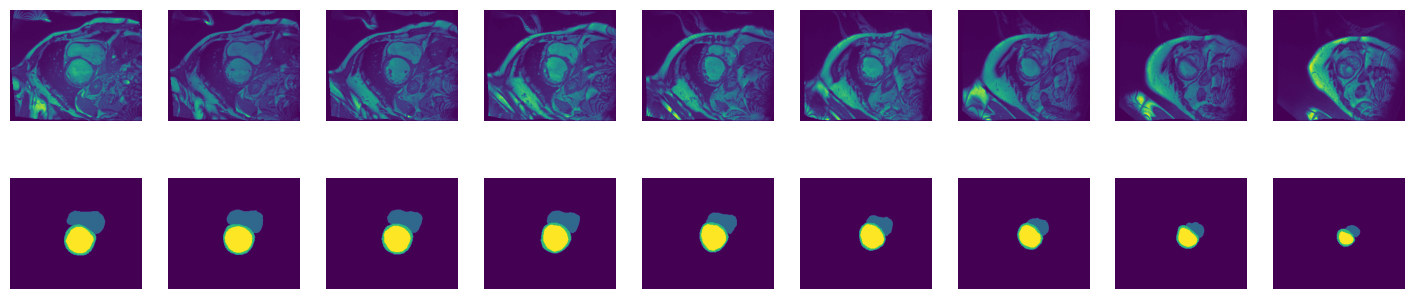


***************************************************************************************************************************************************************



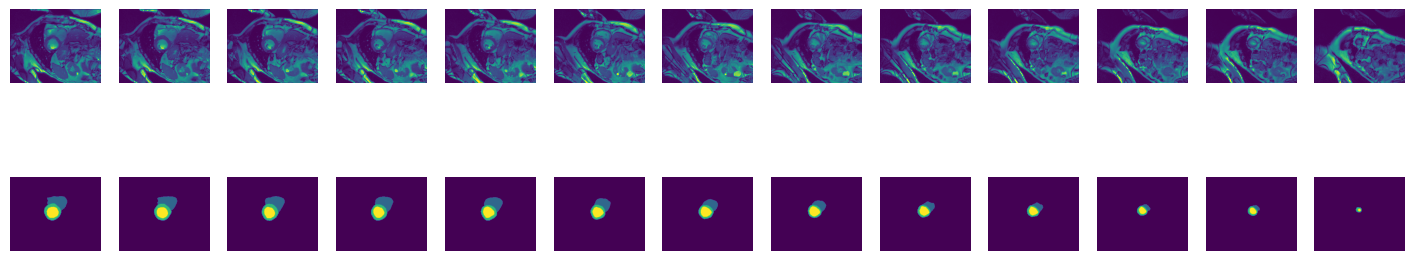


***************************************************************************************************************************************************************



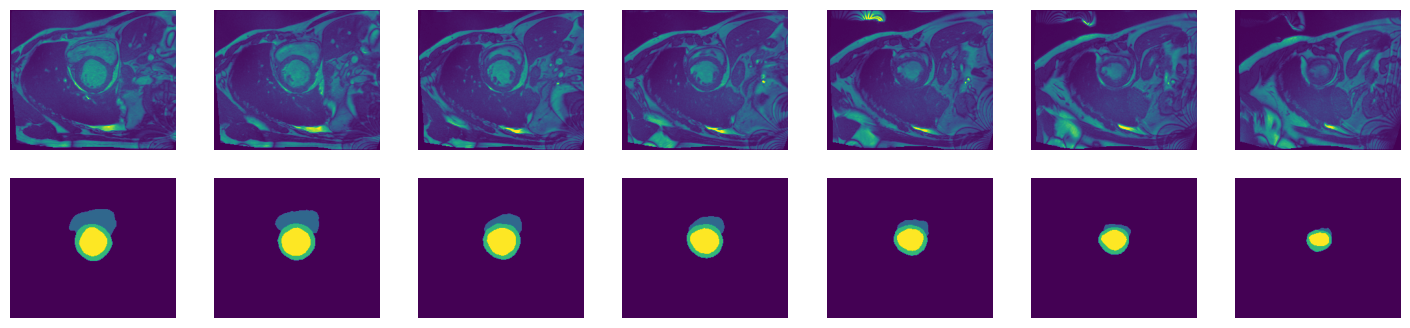


***************************************************************************************************************************************************************



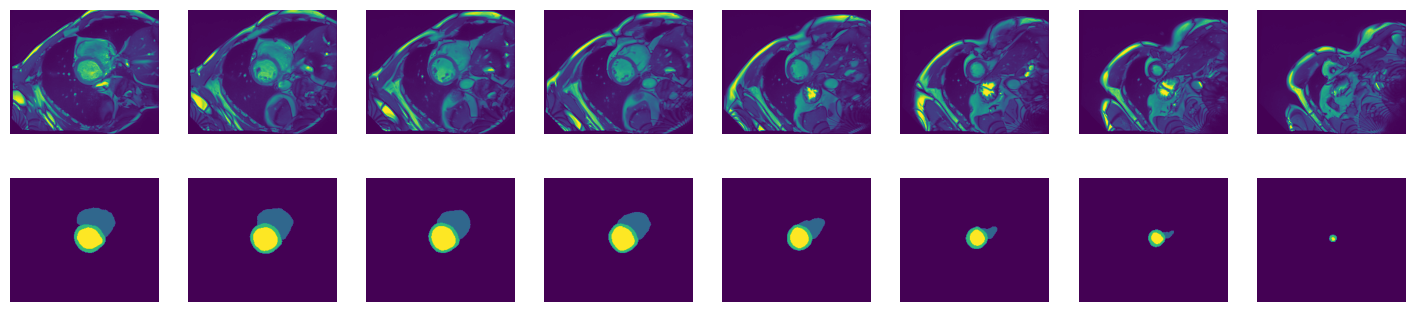


***************************************************************************************************************************************************************



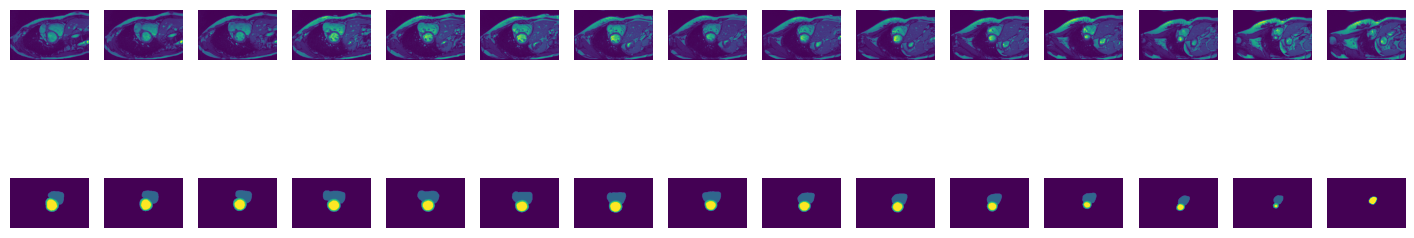


***************************************************************************************************************************************************************



In [28]:
# random 5 image-mask pairs from training set
for _ in range(5):
  idx = random.randint(0, 99)
  show_image_mask(idx, training_images, training_gt)
  print('\n***************************************************************************************************************************************************************\n')

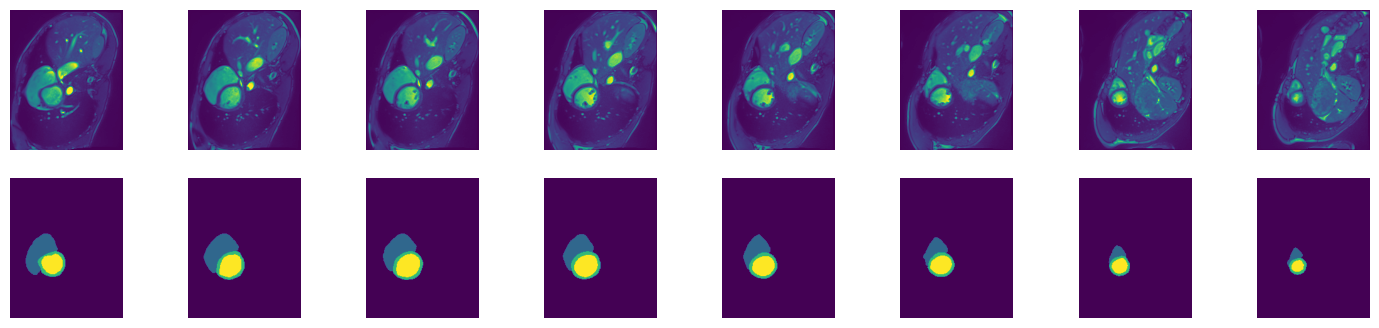


***************************************************************************************************************************************************************



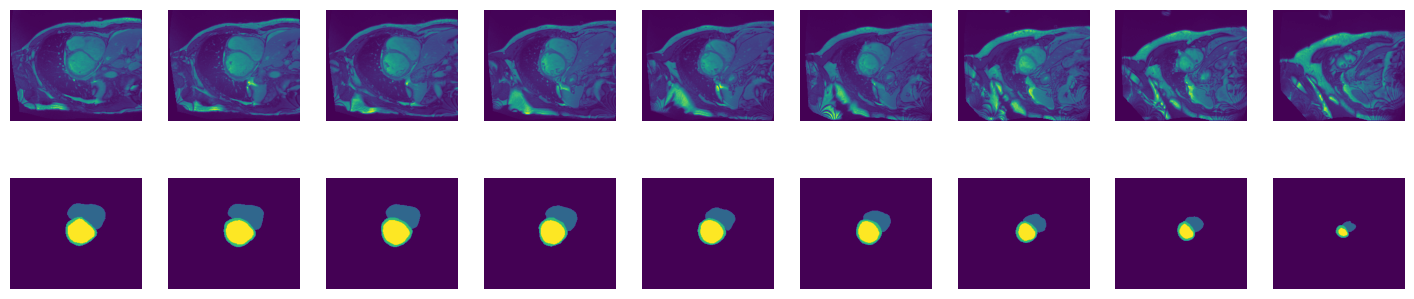


***************************************************************************************************************************************************************



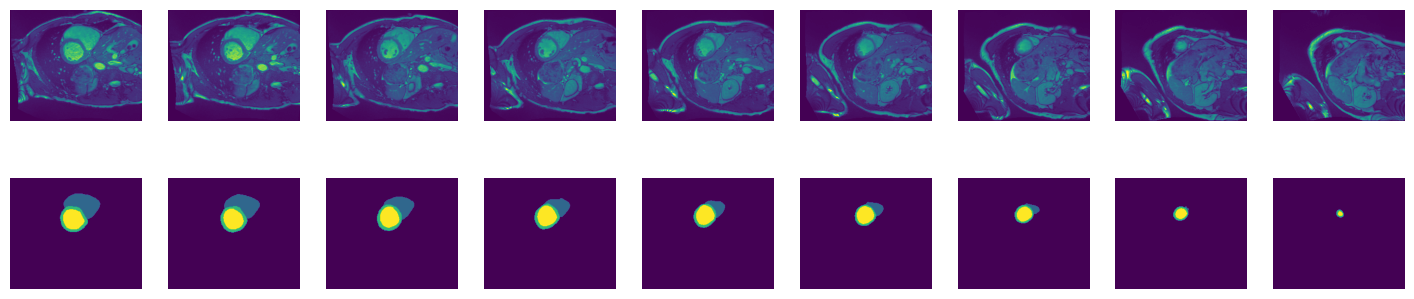


***************************************************************************************************************************************************************



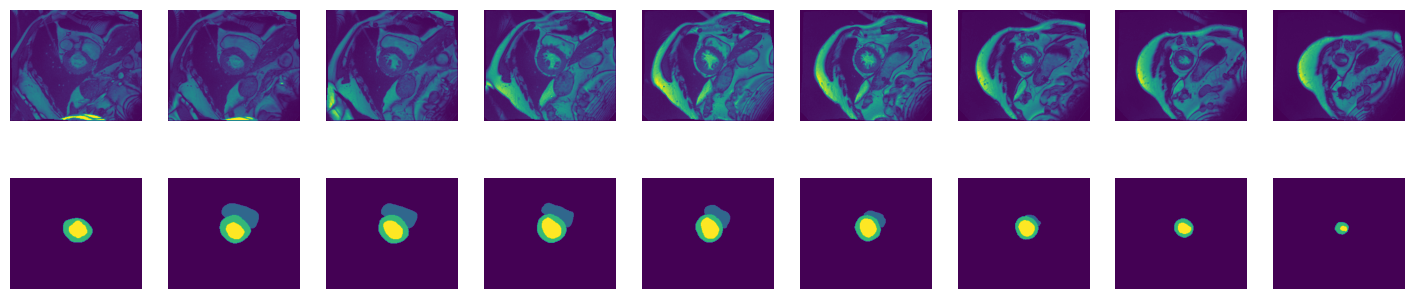


***************************************************************************************************************************************************************



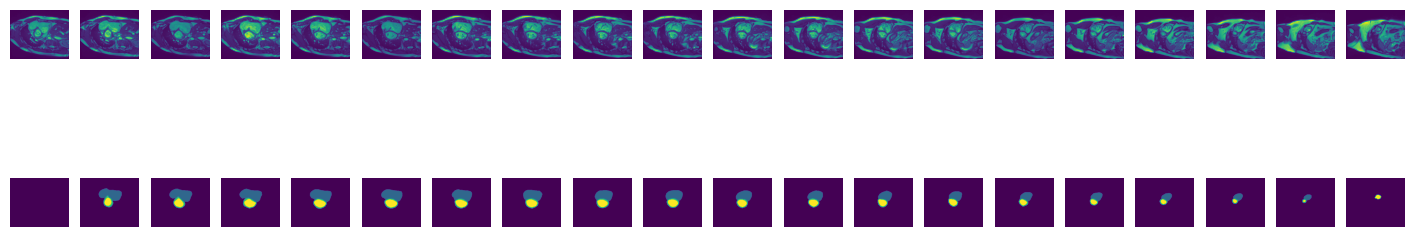


***************************************************************************************************************************************************************



In [29]:
# random 5 image-mask pairs from testing set

for _ in range(5):
  idx = random.randint(0, 49)
  show_image_mask(idx, testing_images, testing_gt)
  print('\n***************************************************************************************************************************************************************\n')

### Preprocessing

<h3>Part 1. Channel separation

1. Empty lists are defined.
2. According to the number of channels in each image-mask pair, every single image is extracted.
3. Image-mask pair is appended to the emply "..._final" lists.
4. "..._final" listes are converted into numpy arrays with initial variable names.

In [30]:
training_images_final = []; training_gt_final = []
testing_images_final = []; testing_gt_final = []

for image in training_images:
  channel = image.shape[-1]
  for ch in range(channel):
    training_images_final.append(image[:,:,ch])

for image in training_gt:
  channel = image.shape[-1]
  for ch in range(channel):
    training_gt_final.append(image[:,:,ch])

for image in testing_images:
  channel = image.shape[-1]
  for ch in range(channel):
    testing_images_final.append(image[:,:,ch])

for image in testing_gt:
  channel = image.shape[-1]
  for ch in range(channel):
    testing_gt_final.append(image[:,:,ch])


training_images = np.array(training_images_final)
training_gt = np.array(training_gt_final)

testing_images = np.array(testing_images_final)
testing_gt = np.array(testing_gt_final)

<ipython-input-30-0b26f2b9b835>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_images = np.array(training_images_final)
<ipython-input-30-0b26f2b9b835>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_gt = np.array(training_gt_final)
<ipython-input-30-0b26f2b9b835>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

<h3>Part 2. Shape correction

In [31]:
# checking image shapes in train set

for _ in range(10):
  i = random.randint(0, 950)
  print('Image Shape:', training_images[i].shape, '  Mask Shape:', training_gt[i].shape)

Image Shape: (208, 174)   Mask Shape: (208, 174)
Image Shape: (256, 216)   Mask Shape: (256, 216)
Image Shape: (208, 256)   Mask Shape: (208, 256)
Image Shape: (216, 256)   Mask Shape: (216, 256)
Image Shape: (216, 304)   Mask Shape: (216, 304)
Image Shape: (256, 256)   Mask Shape: (256, 256)
Image Shape: (184, 256)   Mask Shape: (184, 256)
Image Shape: (224, 256)   Mask Shape: (224, 256)
Image Shape: (208, 256)   Mask Shape: (208, 256)
Image Shape: (224, 256)   Mask Shape: (224, 256)


In [32]:
# checking image shapes in test set

for _ in range(10):
  i = random.randint(0, 537)
  print('Image Shape:', testing_images[i].shape, '  Mask Shape:', testing_gt[i].shape)

Image Shape: (162, 208)   Mask Shape: (162, 208)
Image Shape: (174, 208)   Mask Shape: (174, 208)
Image Shape: (240, 166)   Mask Shape: (240, 166)
Image Shape: (216, 256)   Mask Shape: (216, 256)
Image Shape: (232, 288)   Mask Shape: (232, 288)
Image Shape: (248, 256)   Mask Shape: (248, 256)
Image Shape: (256, 216)   Mask Shape: (256, 216)
Image Shape: (256, 214)   Mask Shape: (256, 214)
Image Shape: (174, 208)   Mask Shape: (174, 208)
Image Shape: (216, 256)   Mask Shape: (216, 256)


"albumentations" library will be used to resize images.

1. Padding of images
2. Resize to 256x256

In [33]:
import albumentations as albu
import cv2

def image_albu_reshape(img):

  transform = albu.Compose([
    albu.PadIfNeeded(min_height=256, min_width=256, always_apply=True, border_mode=cv2.BORDER_CONSTANT, value=[0, 0, 0]),
    albu.Resize(height=256, width=256, always_apply=True)
  ])

  transformed = transform(image = img)
  img = transformed['image']
  return img

Same procedure of lists is applied here.

In [34]:
training_images_final = []; training_gt_final = []
testing_images_final = []; testing_gt_final = []


for image in training_images:
  training_images_final.append(image_albu_reshape(image))

for image in training_gt:
  training_gt_final.append(image_albu_reshape(image))

for image in testing_images:
  testing_images_final.append(image_albu_reshape(image))

for image in testing_gt:
  testing_gt_final.append(image_albu_reshape(image))

training_images = np.array(training_images_final)
training_gt = np.array(training_gt_final)

testing_images = np.array(testing_images_final)
testing_gt = np.array(testing_gt_final)

###Saving Numpy Arrays

In [35]:
folder_path = '/content/drive/MyDrive/DeepLearningProject/arrays'

np.save(folder_path+'/training_images.npy', training_images)
np.save(folder_path+'/training_gt.npy', training_gt)
np.save(folder_path+'/testing_images.npy', testing_images)
np.save(folder_path+'/testing_gt.npy', testing_gt)